In [1]:
#NSL KDD dataset

In [2]:
#mouting gdrive
# from google.colab import drive
# drive.mount('/content/gdrive')

In [3]:
#GPU check
# %tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle
import warnings
warnings.filterwarnings('ignore')

In [2]:
# training dataset
path = "D:\\Reaserch Practice\\NSL-KDD\\KDDTrain+.txt"
df = pd.read_csv(path,header= None)
df.head()


,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [3]:
# testing dataset
path = "D:\\Reaserch Practice\\NSL-KDD\\KDDTest+.txt"
test_df = pd.read_csv(path,header = None)
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [4]:
# adding columns
cols = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
'num_access_files', 'num_outbound_cmds', 'is_host_login',
'is_guest_login', 'count', 'srv_count', 'serror_rate',
'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
'dst_host_srv_count', 'dst_host_same_srv_rate','dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
'dst_host_srv_rerror_rate', 'subclass', 'difficulty_level']

df.columns = cols
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,subclass,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [5]:
test_df.columns = cols
test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,subclass,difficulty_level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [6]:
# dropping difficulty level in train datset
df = df.drop(columns= ['difficulty_level'] , axis = 1)
df.shape

(125973, 42)

In [7]:
# dropping difficulty level in test datset
test_df = test_df.drop(columns= ['difficulty_level'] , axis = 1)
test_df.shape

(22544, 42)

In [8]:
print(df.isnull().values.any())
print(test_df.isnull().values.any())

False
False


In [9]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
print(cat_cols)

['protocol_type', 'service', 'flag', 'subclass']


In [10]:
# merging df & test_df
c_df = pd.concat([df,test_df])
c_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148517 entries, 0 to 22543
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148517 non-null  int64  
 1   protocol_type                148517 non-null  object 
 2   service                      148517 non-null  object 
 3   flag                         148517 non-null  object 
 4   src_bytes                    148517 non-null  int64  
 5   dst_bytes                    148517 non-null  int64  
 6   land                         148517 non-null  int64  
 7   wrong_fragment               148517 non-null  int64  
 8   urgent                       148517 non-null  int64  
 9   hot                          148517 non-null  int64  
 10  num_failed_logins            148517 non-null  int64  
 11  logged_in                    148517 non-null  int64  
 12  num_compromised              148517 non-null  int64  
 13  

In [11]:
# removing attack_subclass
temp_df = c_df.pop('subclass')

In [12]:
temp_df.head()

0     normal
1     normal
2    neptune
3     normal
4     normal
Name: subclass, dtype: object

In [13]:
# helper function for one-hot encoding for catagorical cols
def one_hot_helper(df,cols):
  for each in cols:
    dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(columns = [each], axis=1)
  return df

In [14]:
c_df = one_hot_helper(c_df,cat_cols[:-1])

In [15]:
print(c_df.columns)

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       ...
       'flag_REJ', 'flag_RSTO', 'flag_RSTOS0', 'flag_RSTR', 'flag_S0',
       'flag_S1', 'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH'],
      dtype='object', length=122)


In [16]:
# helper function for min-max normalization of numerical values
def normalize(df, cols):
    result = df.copy() 
    for feature_name in cols:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        if max_value > min_value:
            result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [17]:
new_df = normalize(c_df,c_df.columns)
new_df.head()


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
# catagorizing subclass

# Denial of Service (DoS) – A malicious attempt toblock system or network resources and services.
dos_attacks = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm']

# Probe – This attack collects the information about potential vulnerabilities of the target system that 
# can be used to later be used to launch attacks on those systems
probe_attacks = ['ipsweep','mscan','nmap','portsweep','saint','satan']

#   User to Root (U2R) – rivilege_attacks :  In this, attackers access the system as a normal user and break the vulnerabilities 
#   to gain administrative privileges.
privilege_attacks = ['buffer_overflow','loadmdoule','perl','ps','rootkit','sqlattack','xterm']

# Remote to Local (R2L) Sybil – access_attacks:  Unauthorized ability to dump data packets to remote system over network and
# gain access either as a user or root to do their unauthorized activity.
access_attacks = ['ftp_write','guess_passwd','http_tunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xclock','xsnoop']

In [19]:
print(c_df.isnull().values.any())

False


In [20]:
c_df.shape

(148517, 122)

In [21]:
# helper function for merging attack in common class
def attackMapper(attack):   
    if attack in dos_attacks:
        attack_type = "DoS"
    elif attack in probe_attacks:
        attack_type = "Probe"
    elif attack in privilege_attacks :
        attack_type = "U2R"
    elif attack in access_attacks:
        attack_type = "Sybil-R2L"
    else:
        attack_type = "Normal"
    return attack_type

In [22]:
attack_map = [attackMapper(attack) for attack in temp_df]
# attack_map

In [23]:
from collections import Counter
print(Counter(attack_map))

Counter({'Normal': 77207, 'DoS': 53387, 'Probe': 14077, 'Sybil-R2L': 3738, 'U2R': 108})


In [24]:
class_df = pd.DataFrame(attack_map)
# class_df.head()
cols = ["class"]
class_df.columns = cols

In [25]:
# class_df.value_counts()

In [26]:
# class_df.isnull().any()
class_df.tail()

,class
148512,Normal
148513,Normal
148514,DoS
148515,Normal
148516,Probe


In [27]:
# new_df["class"] = class_df
new_df.isnull().any()

duration          False
src_bytes         False
dst_bytes         False
land              False
wrong_fragment    False
                  ...  
flag_S1           False
flag_S2           False
flag_S3           False
flag_SF           False
flag_SH           False
Length: 122, dtype: bool

In [28]:
new_df.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [29]:
print(new_df.isnull().any())
print("Shape: " ,new_df.shape)

duration          False
src_bytes         False
dst_bytes         False
land              False
wrong_fragment    False
                  ...  
flag_S1           False
flag_S2           False
flag_S3           False
flag_SF           False
flag_SH           False
Length: 122, dtype: bool
Shape:  (148517, 122)


In [30]:
class_df.isnull().any()

class    False
dtype: bool

In [31]:
class_df.head()
class_df.shape

(148517, 1)

In [32]:
# y

In [33]:
combine_x = new_df.copy()
y = class_df.copy()
y.shape

(148517, 1)

In [34]:
new_train_df = new_df.copy()
new_train_df["class"] = attack_map

In [35]:
new_train_df.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,class
0,0.0,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Normal
1,0.0,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Normal
2,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,DoS
3,0.0,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Normal
4,0.0,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Normal


In [36]:
new_train_df.shape

(148517, 123)

In [37]:
# modelling
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
kfold.get_n_splits(combine_x,y)

5

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import roc_curve, roc_auc_score, auc
import sklearn.metrics as metrics

In [39]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU, Bidirectional, BatchNormalization,Convolution1D,MaxPooling1D, Reshape, GlobalAveragePooling1D

Using TensorFlow backend.


In [43]:
batch_size = 16
model = Sequential()
model.add(Convolution1D(64, kernel_size=122, padding="same",activation="relu",input_shape=(122, 1)))
model.add(MaxPooling1D(pool_size = 5))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(64, return_sequences=False))) 
model.add(Reshape((128, 1), input_shape = (128, )))

model.add(MaxPooling1D(pool_size = 5))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(128, return_sequences=False))) 

model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [44]:
for layer in model.layers:
    print(layer.output_shape)

(None, 122, 64)
(None, 24, 64)
(None, 24, 64)
(None, 128)
(None, 128, 1)
(None, 25, 1)
(None, 25, 1)
(None, 256)
(None, 256)
(None, 5)
(None, 5)


In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 122, 64)           7872      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 24, 64)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 64)            256       
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               66048     
_________________________________________________________________
reshape_1 (Reshape)          (None, 128, 1)            0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 25, 1)             0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 25, 1)            

In [40]:
from tensorflow import keras
path = "model_cnn_lstm.h5"
model = keras.models.load_model(path)

In [41]:
val_score = list()

for train_index, test_index in kfold.split(combine_x,y):
    train_X, test_X = combine_x.iloc[train_index], combine_x.iloc[test_index]
    train_y, test_y = y.iloc[train_index], y.iloc[test_index]
    
    print("train index:",train_index)
    print("test index:",test_index)
    
    x_columns_train = new_train_df.columns.drop('class')
    x_train_array = train_X[x_columns_train].values
    x_train_1=np.reshape(x_train_array, (x_train_array.shape[0], x_train_array.shape[1], 1))
    
    dummies = pd.get_dummies(train_y) # Classification
    outcomes = dummies.columns
    num_classes = len(outcomes)
    y_train_1 = dummies.values
    
    x_columns_test = new_train_df.columns.drop('class')
    x_test_array = test_X[x_columns_test].values
    x_test_2=np.reshape(x_test_array, (x_test_array.shape[0], x_test_array.shape[1], 1))
    
    dummies_test = pd.get_dummies(test_y) # Classification
    outcomes_test = dummies_test.columns
    num_classes = len(outcomes_test)
    y_test_2 = dummies_test.values
    
    # model.fit(x_train_1, y_train_1,validation_data=(x_test_2,y_test_2), epochs=5)
    
    pred = model.predict(x_test_2)
    pred = np.argmax(pred,axis=1)
    y_eval = np.argmax(y_test_2,axis=1)
    score = metrics.accuracy_score(y_eval, pred)
    val_score.append(score)
    print("Validation score: {}".format(score))

train index: [     0      2      3 ... 148514 148515 148516]
test index: [     1      5     13 ... 148503 148506 148513]
Validation score: 0.9922569350929168
train index: [     0      1      3 ... 148513 148514 148516]
test index: [     2      8     10 ... 148507 148509 148515]
Validation score: 0.9924252625908968
train index: [     0      1      2 ... 148514 148515 148516]
test index: [     3      7     14 ... 148501 148502 148505]
Validation score: 0.9934686731979935
train index: [     0      1      2 ... 148512 148513 148515]
test index: [     4      9     12 ... 148510 148514 148516]
Validation score: 0.9932666733999933
train index: [     1      2      3 ... 148514 148515 148516]
test index: [     0      6     19 ... 148498 148511 148512]
Validation score: 0.9914486752179914


In [42]:
val_score

[0.9922569350929168,
 0.9924252625908968,
 0.9934686731979935,
 0.9932666733999933,
 0.9914486752179914]

In [49]:
# model.save("model_cnn_lstm.h5")

In [43]:
from sklearn.metrics import confusion_matrix

confussion_matrix=confusion_matrix(y_eval, pred, labels=[0,1,2,3,4])
confussion_matrix

array([[10656,    21,     0,     0,     0],
       [   11, 15313,    38,    77,     2],
       [    0,    11,  2804,     0,     0],
       [    0,    80,     1,   667,     0],
       [    0,     5,     0,     8,     9]], dtype=int64)

In [44]:
# helper function to plot confusion matrix
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()


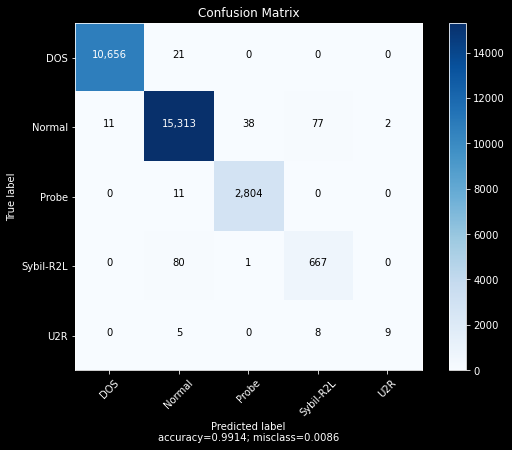

In [45]:
plot_confusion_matrix(cm           = confussion_matrix, 
                      normalize    = False,
                      target_names = ["DOS","Normal","Probe","Sybil-R2L","U2R"],
                      title        = "Confusion Matrix")

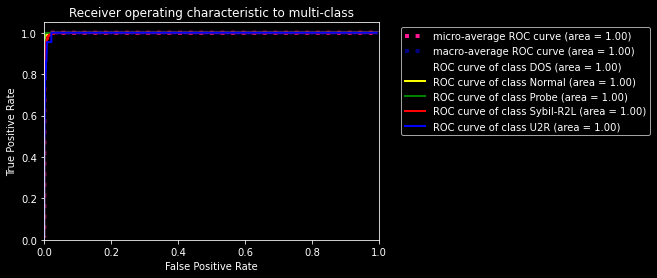

In [48]:

target_class=[]
target_class=["DOS","Normal","Probe","Sybil-R2L","U2R"]

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

pred1 = model.predict(x_test_2)
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_test_2[:, i], pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_2.ravel(), pred1.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(5)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(5):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

#  average it and compute AUC
mean_tpr /= 5

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['black', 'yellow', 'green','red','blue'])
for i, color in zip(range(5), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(target_class[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.savefig('ROC_full_range.png')
plt.show()

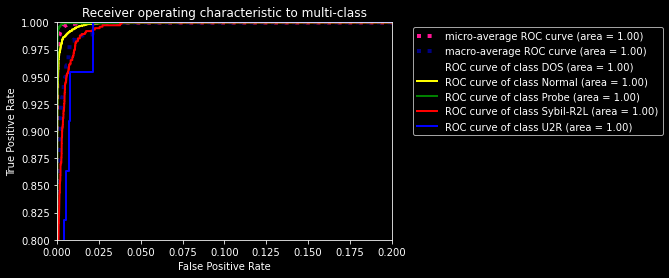

In [50]:
# plotting ROC curve

target_class=[]
target_class=["DOS","Normal","Probe","Sybil-R2L","U2R"]

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

pred1 = model.predict(x_test_2)

lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_test_2[:, i], pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_2.ravel(), pred1.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(5)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(5):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

#  average it and compute AUC
mean_tpr /= 5

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['black', 'yellow', 'green','red','blue'])
for i, color in zip(range(5), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(target_class[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.savefig('ROC_custom_range.png')
plt.show()